<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data_load" data-toc-modified-id="Data_load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data_load</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#ProvideInfo_data" data-toc-modified-id="ProvideInfo_data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ProvideInfo_data</a></span></li><li><span><a href="#Likert-data" data-toc-modified-id="Likert-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Likert data</a></span></li></ul></li><li><span><a href="#Qualitative-analysis" data-toc-modified-id="Qualitative-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Qualitative analysis</a></span><ul class="toc-item"><li><span><a href="#Dissatisfaction" data-toc-modified-id="Dissatisfaction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dissatisfaction</a></span></li><li><span><a href="#What-privacy-has-been-compromised?-(Optional)" data-toc-modified-id="What-privacy-has-been-compromised?-(Optional)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>What privacy has been compromised? (Optional)</a></span></li></ul></li></ul></div>

In [4]:
import os
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import ThemeType
import copy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib.colors as mcolors
import scienceplots
from itertools import combinations
import matplotlib.ticker as ticker
from collections import Counter
from matplotlib.patches import Patch
from sklearn.metrics import cohen_kappa_score
import re

## Data_load

In [5]:
Analysis_df = pd.read_excel('Data/REDACTED_Data.xlsx')

print(Analysis_df.shape)
print(Analysis_df.columns)

(846, 45)
Index(['Which of the following best describes who you are when using the healthcare chatbot? ',
       'Did you provide any personal information, such as age, in the consultation experience? Why？',
       'What is your dissatisfaction with the consultation experience?',
       'Will you verify this advice?', 'Will you adopt this advice?',
       'Do you think this consultation has breached your privacy?',
       'What privacy has been compromised? (Optional)', 'basic information',
       'lifestyle', 'mental health information', 'medical Information',
       'Your family members', 'Healthcare providers', 'Government agencies',
       'LLM service providers', 'Recipient-Family members',
       'Recipient-Healthcare providers', 'Recipient-Government agencies',
       'Recipient-LLM service providers', 'If you have given consent',
       'If you are notified before collection',
       'If information is kept confidential and not stored',
       'If information will be stored',
 

## Analysis

In [6]:
value_counts_role = Analysis_df['Which of the following best describes who you are when using the healthcare chatbot? '].value_counts()
value_counts_provideinfo = Analysis_df['Did you provide any personal information, such as age, in the consultation experience? Why？'].value_counts()
value_counts_checksugg = Analysis_df['Will you verify this advice?'].value_counts()
value_counts_takesugg = Analysis_df['Will you adopt this advice?'].value_counts()
value_counts_LeakPrivacy = Analysis_df['Do you think this consultation has breached your privacy?'].value_counts()

# value_counts_AIConsult = Analysis_df['Do you have any healthcare consultation experience with any AI-large-scale-model except in our survey?'].value_counts()
# count_AICons_no_AI_yes = Analysis_df[(Analysis_df['Do you have any healthcare consultation experience with any AI-large-scale-model except in our survey?'] == 'No') & (Analysis_df['Do you have any experience with any AI-large-scale-model except in our survey?'] == 'Yes')].shape[0]
# value_counts_AI_no_listen = Analysis_df[(Analysis_df['Do you have any healthcare consultation experience with any AI-large-scale-model except in our survey?'] == 'No') & (Analysis_df['Do you have any experience with any AI-large-scale-model except in our survey?'] == 'No')]['Have you ever heard of AI-large-scale-model?'].value_counts()
# value_counts_AICons_no_online = Analysis_df[Analysis_df['Do you have any healthcare consultation experience with any AI-large-scale-model except in our survey?'] == 'No']['Do you have any healthcare consultation experience online?'].value_counts()


In [7]:
print(value_counts_role)
print(value_counts_provideinfo)
print(value_counts_checksugg)
print(value_counts_takesugg)
print(value_counts_LeakPrivacy)

Users consulting on personal health issues              381
Users consulting on general health knowledge            333
Healthcare professional or with a medical background    132
Name: Which of the following best describes who you are when using the healthcare chatbot? , dtype: int64
Yes [Seeking personalized advice]                            309
Yes [Believing LLM will keep my information confidential]    244
No [The question is unrelated to personal information]       115
No [Concerned about privacy; prefer not to disclose]          84
Yes [LLM requested during the conversation]                   47
Yes [Other]                                                   19
No [Other]                                                    15
No [Believing it's pointless to disclose]                     13
Name: Did you provide any personal information, such as age, in the consultation experience? Why？, dtype: int64
Likely                329
Extremely likely      215
Neutral               177
Unli

In [8]:
print(value_counts_role)
key_percentages = {key: count / Analysis_df.shape[0] for key, count in value_counts_role.items()}
for key, value in key_percentages.items():
    print(f"{key}: {value:.2%}")

Users consulting on personal health issues              381
Users consulting on general health knowledge            333
Healthcare professional or with a medical background    132
Name: Which of the following best describes who you are when using the healthcare chatbot? , dtype: int64
Users consulting on personal health issues: 45.04%
Users consulting on general health knowledge: 39.36%
Healthcare professional or with a medical background: 15.60%


In [9]:
print(value_counts_provideinfo)
key_percentages = {key: count / Analysis_df.shape[0] for key, count in value_counts_provideinfo.items()}
for key, value in key_percentages.items():
    print(f"{key}: {value:.2%}")

Yes [Seeking personalized advice]                            309
Yes [Believing LLM will keep my information confidential]    244
No [The question is unrelated to personal information]       115
No [Concerned about privacy; prefer not to disclose]          84
Yes [LLM requested during the conversation]                   47
Yes [Other]                                                   19
No [Other]                                                    15
No [Believing it's pointless to disclose]                     13
Name: Did you provide any personal information, such as age, in the consultation experience? Why？, dtype: int64
Yes [Seeking personalized advice]: 36.52%
Yes [Believing LLM will keep my information confidential]: 28.84%
No [The question is unrelated to personal information]: 13.59%
No [Concerned about privacy; prefer not to disclose]: 9.93%
Yes [LLM requested during the conversation]: 5.56%
Yes [Other]: 2.25%
No [Other]: 1.77%
No [Believing it's pointless to disclose]: 1.54%


In [11]:
Analysis_df.loc[Analysis_df['Did you provide any personal information, such as age, in the consultation experience? Why？'].str.startswith('Yes'), 'provideinfo_yesorno'] = 'yes'
Analysis_df.loc[Analysis_df['Did you provide any personal information, such as age, in the consultation experience? Why？'].str.startswith('No'), 'provideinfo_yesorno'] = 'no'

provideinfo_yesorno = Analysis_df["provideinfo_yesorno"].value_counts()
print(provideinfo_yesorno)
key_percentages = {key: count / Analysis_df.shape[0] for key, count in provideinfo_yesorno.items()}
for key, value in key_percentages.items():
    print(f"{key}: {value:.2%}")

yes    619
no     227
Name: provideinfo_yesorno, dtype: int64
yes: 73.17%
no: 26.83%


## Visualization

### ProvideInfo_data

In [12]:
ProvideInfo_data = {
    'Reason': ["Seeking personalized advice", 
               "Believing LLM will keep my information confidential",
               "LLM requested during the conversation",
               "Other (Yes)",
               "The question is unrelated to personal information",
               "Concerned about privacy, prefer not to disclose",
               "Other (No)",
               "Believing it's pointless to disclose"],
    'Count': [309, 244, 47, 19, -115, -84,  -15, -13]
}

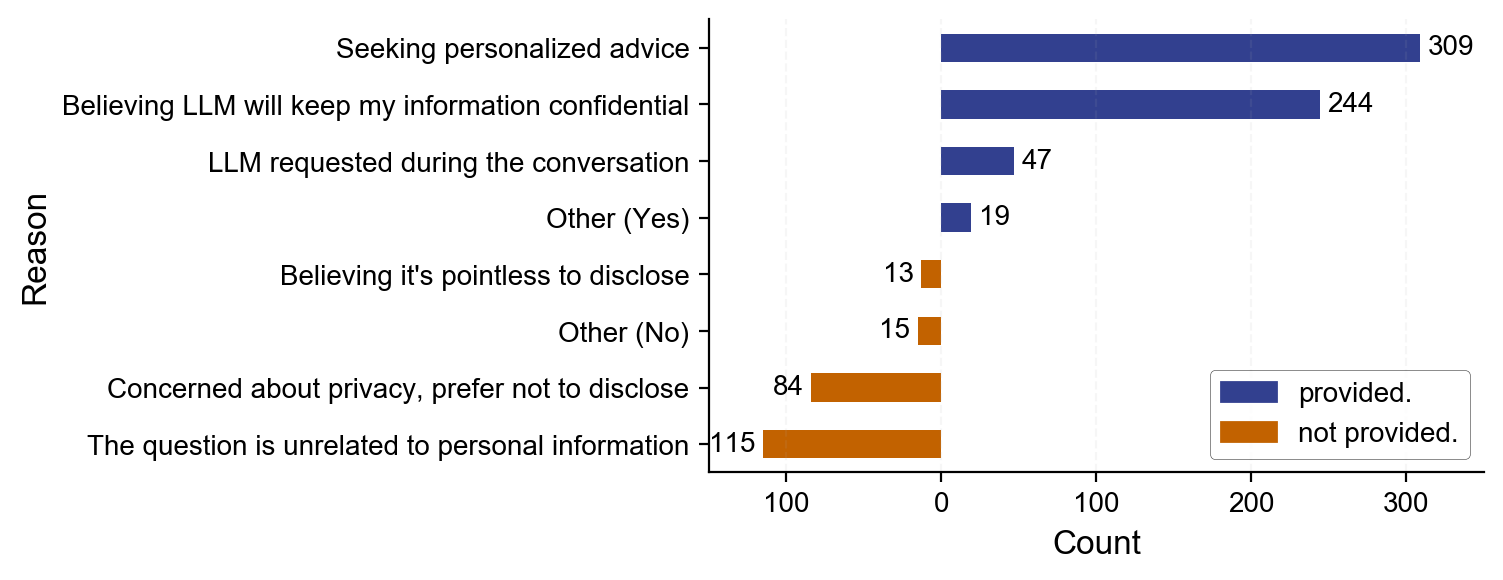

In [13]:
ProvideInfo_df = pd.DataFrame(ProvideInfo_data)
ProvideInfo_df_sorted = ProvideInfo_df.sort_values(by='Count', ascending=True)

plt.rcParams['font.family'] = "Arial"
fig,ax = plt.subplots(figsize=(5,3), dpi=200)

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ProvideInfo_df_sorted['Count'].plot(kind='barh', color=ProvideInfo_df_sorted['Count'].map(lambda x: '#32408f' if x > 0 else '#c26200'), ax=ax)
ax.set_yticklabels(ProvideInfo_df_sorted['Reason'])
ax.set_xlim(-150, 350)

def abs_value(x, pos):
    return '{}'.format(int(abs(x)))

formatter = ticker.FuncFormatter(abs_value)
ax.xaxis.set_major_formatter(formatter)

ax.xaxis.grid(True)

plt.xlabel('Count', fontdict={'family' : 'Arial', 'size':12})
plt.ylabel('Reason', fontdict={'family' : 'Arial', 'size':12})

ax.yaxis.grid(False)  
ax.xaxis.grid(True, linestyle='--', alpha=0.1)  

# legend
legend_elements = [Patch(facecolor='#32408f', edgecolor='#32408f', label='provided.'),
                   Patch(facecolor='#c26200', edgecolor='#c26200', label='not provided.')]
leg = ax.legend(handles=legend_elements, loc='lower right', prop={'family':'Arial', 'size':10})
leg.get_frame().set_facecolor('white') #none
leg.get_frame().set_edgecolor('black') 
leg.get_frame().set_linewidth(0.2) 


# value label
for index, value in enumerate(ProvideInfo_df_sorted['Count']):
    if value > 0:
        plt.text(value + 5, index, str(abs(value)), va='center') 
    else:
        plt.text(value - 5, index, str(abs(value)), ha='right', va='center')  

# plt.savefig('00Results/images/RQ1/ProvideInfo.pdf', dpi=300, bbox_inches="tight")

plt.show()

### Likert data

In [15]:
RQ1_df = copy.deepcopy(Analysis_df)

order_list = [
    "Extremely unlikely",
    "Unlikely",
    "Neutral",
    "Likely",
    "Extremely likely"
]

column_list = [
   'Will you verify this advice?',
   'Will you adopt this advice?',
    'Do you think this consultation has breached your privacy?'
]


data_list = []
for column in RQ1_df[column_list]:
    frequencies = RQ1_df[column].value_counts().reindex(order_list)
    percentages = (RQ1_df[column].value_counts(normalize=True) * 100).reindex(order_list)
    data_list.append({
        'label': column,
        'frequencies': frequencies,
        'percentages': percentages
    })

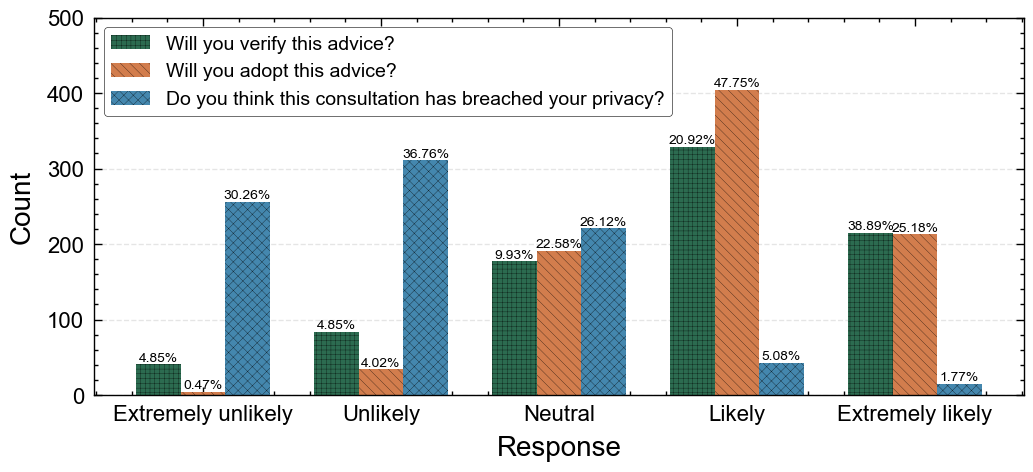

In [17]:
# from matplotlib.patches import Patch
# colors = ["#E88B00","#00838F","#3B7097"]
# colors = plt.get_cmap('tab10').colors
# colors = ["#1f77b4", "#ff7f0e","#2ca02c", "#009487"]#
# colors = ["#003f5c", "#58508d", "#bc5090"]

lw = 0.1
plt.rcParams['hatch.linewidth'] = lw

colors = ["#2c6b50", "#d27d4d", "#4487ae"]

hatches = ['+', '\\', 'x']

with plt.style.context(['science','no-latex','grid']):
    plt.rcParams['font.family'] = "Arial"

#     fig, ax1 = plt.subplots(figsize=(10, 6))
    fig,ax1 = plt.subplots(figsize=(6,2.5), dpi=200)
    
#     ax1.spines['top'].set_visible(False)
#     ax1.spines['right'].set_visible(False)

    width = 0.25
    index = pd.Index(range(len(order_list)))

    for i, data in enumerate(data_list):
        bars = ax1.bar(index + width*i, data['frequencies'], width=width, label=data['label'], color=colors[i],hatch=hatches[i] * 7)

        # percentage_label
        for bar in bars:
            height = bar.get_height()
            percentage_label = f"{data['percentages'].values[int(bar.get_x() + width*i)]:.2f}%"
            ax1.text(bar.get_x() + bar.get_width() / 2., height, percentage_label,
                     ha='center', va='bottom',size=5)

    ax1.set_xlabel('Response', fontdict={'family' : 'Arial', 'size':10})
    ax1.set_ylabel('Count', fontdict={'family' : 'Arial', 'size':10})
    ax1.set_yticks((0,100,200,300,400,500))
    ax1.set_yticklabels((0,100,200,300,400,500),size=8)  
    # ax1.set_title('Survey Responses Analysis')
    ax1.set_xticks(index + width)
    ax1.set_xticklabels(order_list,size=8)
    
    leg = ax1.legend(loc='best',ncol=1, prop={'family':'Arial', 'size':7})
    leg.get_frame().set_facecolor('white') #none
    leg.get_frame().set_edgecolor('black') 
    leg.get_frame().set_linewidth(0.2) 
    
    ax1.yaxis.grid(True, linestyle='--', alpha=0.1)  
    ax1.xaxis.grid(False)
    
#     plt.savefig('00Results/images/RQ1/VerifyTakeDisclose.pdf', dpi=300, bbox_inches="tight")

    plt.show()

## Qualitative analysis

### Dissatisfaction

In [18]:
value_counts_unsatisfy = Analysis_df['What is your dissatisfaction with the consultation experience?'].value_counts()
value_counts_unsatisfy

None                                                                                                                                            479
Unclear response or untargeted                                                                                                                  144
Unknown source or concerns about accuracy                                                                                                        86
Other [REDACTED]                                                                                                                                 34
Unclear response or untargeted┋Unknown source or concerns about accuracy                                                                         22
Unknown source or concerns about accuracy[REDACTED]                                                                                              20
Unclear response or untargeted┋Chatbot overly asks for personal information                                     

In [19]:
unsatisfy_df = copy.deepcopy(Analysis_df)

In [20]:
def count_frequency(df, column_name):
    counter = Counter()
    for row in df[column_name]:
        if pd.notnull(row):
            # Splitting each option and determining if there is only one option
            options = row.split('┋') if '┋' in row else [row]
            for option in options:
                # If it contains free text, skip it
                if '[' in option and ']' in option:
                    continue
                counter[option] += 1
    return counter



# Calculate the number of options containing free text
def count_freetext(df, column_name):
    count = 0
    for row in df[column_name]:
        if pd.notnull(row):
            options = row.split('┋') if '┋' in row else [row]
            for option in options:
                if '[' in option and ']' in option:
                    count += 1
    return count

# Frequency of multiple choice statistics
multichoice_counts = count_frequency(unsatisfy_df, "What is your dissatisfaction with the consultation experience?")
freetext_counts = count_freetext(unsatisfy_df, "What is your dissatisfaction with the consultation experience?") 

print(f"Frequency of each option:")
for option, count in multichoice_counts.items():
    print(f"{option}: {count}")

print(f"\nNumber of options with free text: {freetext_counts}")

Frequency of each option:
Unclear response or untargeted: 201
Unknown source or concerns about accuracy: 119
None: 479
Uncomfortable response: 6
Other: 9
Chatbot overly asks for personal information: 31

Number of options with free text：75


In [24]:
# Counting the number of occurrences of a particular selection and its free-text portion separately
individual_counts = {}
freetext_counts_each_option = {}
special_options = [
    "Unknown source or concerns about accuracy",
    "Uncomfortable response",
    "Other"
]

for option in special_options:
    contains_option = unsatisfy_df[unsatisfy_df["What is your dissatisfaction with the consultation experience?"].str.contains(option, na=False)]
    
    # Clean up the other options and keep only the specific options and their free text parts.
    # use regular expressions to extract the options with free text directly
    cleaned_option = contains_option["What is your dissatisfaction with the consultation experience?"].str.extractall(fr'({option}\s?\[.*?\])')[0].value_counts()
    #\s?: matches an optional space (i.e. can match 0 or 1 space).
    individual_counts[option] = cleaned_option
    freetext_counts_each_option[option] = cleaned_option.sum()

for option, counts in individual_counts.items():
    print(f"The frequency of option '{option}':")
    print(counts, '\n')

print(f"The number of free text sections for each particular option is:")
for option, count in freetext_counts_each_option.items():
    print(f"{option}: {count}")

The frequency of option 'Unknown source or concerns about accuracy':
Unknown source or concerns about accuracy[REDACTED]    32
Name: 0, dtype: int64 

The frequency of option 'Uncomfortable response':
Uncomfortable response[REDACTED]    1
Name: 0, dtype: int64 

The frequency of option 'Other':
Other [REDACTED]    42
Name: 0, dtype: int64 

The number of free text sections for each particular option is:
Unknown source or concerns about accuracy: 32
Uncomfortable response: 1
Other: 42


In [25]:
final_df = pd.DataFrame()

for option, counts in individual_counts.items():
    temp_df = counts.reset_index()
    temp_df.columns = ['option', 'frequency']  
    temp_df['specific option'] = option  
    final_df = pd.concat([final_df, temp_df], ignore_index=True)

# final_df.to_excel("Data/00Codebook/Discontent.xlsx",index=False)
final_df

,option,frequency,specific option
0,Unknown source or concerns about accuracy[REDA...,32,Unknown source or concerns about accuracy
1,Uncomfortable response[REDACTED],1,Uncomfortable response
2,Other [REDACTED],42,Other


In [32]:
Codebook_Discontent = pd.read_excel('Data/00Codebook/Codebook-Discontent.xlsx')
print(Codebook_Discontent.shape)
print(Codebook_Discontent.columns)

(73, 7)
Index(['option', 'codes1', 'codes2', 'final_codes', 'final_theme', 'frequency',
       'specific option'],
      dtype='object')


In [33]:
# Use regular expressions to replace different types of commas with a single comma and remove spaces before and after the comma
Codebook_Discontent['final_theme'] = Codebook_Discontent['final_theme'].apply(
    lambda x: re.sub(r'\s*[，,]\s*', ',', x).split(',') if pd.notnull(x) else x
)

# Count the number of each value of theme
themes_counts = Codebook_Discontent.explode('final_theme').groupby('final_theme')['frequency'].sum().sort_values(ascending=False)

# print("\nthe number of each value of theme:")
print(themes_counts)

final_theme
Unknown source or concerns about accuracy    23
Slow response                                17
Unclear response or untargeted               14
Lengthy or repetitive responses               8
UI design                                     6
No further inquiries                          4
No                                            3
Not comprehensible enough                     3
Uncomfortable answer                          1
Name: frequency, dtype: int64


In [34]:
# Use regular expressions to replace different types of commas with a single comma and remove spaces before and after the comma
Codebook_Discontent['final_codes'] = Codebook_Discontent['final_codes'].apply(
    lambda x: re.sub(r'\s*[，,]\s*', ',', x).split(',') if pd.notnull(x) else x
)

# Codebook_PrivacyLeak_descriptions['codes_final'] = Codebook_PrivacyLeak_descriptions['codes_final'].apply(lambda x: x.split(',') if pd.notnull(x) else x)
# Count the number of each value of theme
Discontent_codes_counts = Codebook_Discontent.explode('final_codes').groupby('final_codes')['frequency'].sum().sort_values(ascending=False)

print(Discontent_codes_counts)

final_codes
Slow response                 17
untargeted                    12
accuracy concern              10
unknown source                 8
UI design                      6
repetitive responses           6
treatment                      4
no further inquiries           4
Not comprehensible enough      3
No                             3
inaccurate                     3
lengthy response               2
non-professional               2
Unclear response               2
medicine difficult problem     1
lack of practicality           1
no specific drugs              1
no supporting evidence         1
referential significance       1
lack of explanation            1
rigid                          1
scientific basis               1
no authority                   1
Name: frequency, dtype: int64


In [35]:
# Use list derivatives to generate a list of strings in “value (count)” format.
Discontent_formatted_counts = [f"{value} ({count})" for value, count in Discontent_codes_counts.items()]

# Concatenates the string elements of a list into a single string, separated by commas and spaces
Discontent_formatted_string = ", ".join(Discontent_formatted_counts) + ","

print(Discontent_formatted_string)

Slow response (17), untargeted (12), accuracy concern (10), unknown source (8), UI design (6), repetitive responses (6), treatment (4), no further inquiries (4), Not comprehensible enough (3), No (3), inaccurate (3), lengthy response (2), non-professional (2), Unclear response (2), medicine difficult problem (1), lack of practicality (1), no specific drugs (1), no supporting evidence (1), referential significance (1), lack of explanation (1), rigid (1), scientific basis (1), no authority (1),


In [36]:
Compute_Discontent = pd.read_excel('Data/00Codebook/DiscontentCompute_Codes_Theme_count.xlsx')
print(Compute_Discontent.shape)
print(Compute_Discontent.columns)


(10, 2)
Index(['Theme', 'Codes'], dtype='object')


In [37]:
# Parsing and totalizing code occurrences
def parse_codes(codes_str):
    # Extracting code from strings using regular expressions
    codes = re.findall(r'(\w+(?:\s+\w+)*)\s*\((\d+)\)', codes_str)
    # Total number
    total_count = sum(int(count) for code, count in codes)
    return total_count

# Apply the function to each row of Codes and accumulate the total number of times for each Theme
Compute_Discontent['Total Count'] = Compute_Discontent['Codes'].apply(parse_codes)

# Now that each Theme corresponds to the total count of the respective Codes, we directly group the Themes and then add up the Total Count
theme_counts = Compute_Discontent.groupby('Theme')['Total Count'].sum().reset_index()

print(theme_counts)

                                       Theme  Total Count
0            Lengthy or repetitive responses            8
1                       No further inquiries            4
2                  Not comprehensible enough            3
3                                      Other            9
4     Overly asking for personal information           31
5                              Slow Response           17
6                                  UI design            6
7             Unclear response or untargeted          218
8                       Uncomfortable answer            7
9  Unknown source or concerns about accuracy          151


In [38]:
Discontent = copy.deepcopy(Codebook_Discontent)
print(Discontent.shape)
print(Discontent.columns)
# Codebook_WhatLeak[["codes1","codes2"]]
codes1_list = Discontent.loc[Discontent.index.repeat(Discontent['frequency'])]['codes1'].tolist()
codes2_list = Discontent.loc[Discontent.index.repeat(Discontent['frequency'])]['codes2'].tolist()

# 计算Cohen's Kappa
kappa = cohen_kappa_score(codes1_list, codes2_list)
print("Cohen's Kappa:", kappa)

(73, 7)
Index(['option', 'codes1', 'codes2', 'final_codes', 'final_theme', 'frequency',
       'specific option'],
      dtype='object')
Cohen's Kappa: 0.8545384018619084


### What privacy has been compromised? (Optional)

In [39]:
value_counts_leakPrivacy = Analysis_df['What privacy has been compromised? (Optional)'].value_counts()
value_counts_leakPrivacy


(Skipped)    788
REDACTED      36
(Empty)       22
Name: What privacy has been compromised? (Optional), dtype: int64

In [175]:
# value_counts_leakPrivacy.to_excel('Data/00Codebook/whatLeak.xlsx')

In [40]:
Codebook_WhatLeak = pd.read_excel('Data/00Codebook/Codebook-whatLeak.xlsx')
print(Codebook_WhatLeak.shape)
print(Codebook_WhatLeak.columns)

(33, 6)
Index(['What privacy has been compromised? (Optional)', 'codes1', 'codes2',
       'codes_final', 'theme', 'count'],
      dtype='object')


In [41]:
Codebook_WhatLeak['codes_final'] = Codebook_WhatLeak['codes_final'].apply(
    lambda x: re.sub(r'\s*[，,]\s*', ',', x).split(',') if pd.notnull(x) else x
)

Codebook_WhatLeak['theme'] = Codebook_WhatLeak['theme'].apply(
    lambda x: re.sub(r'\s*[，,]\s*', ',', x).split(',') if pd.notnull(x) else x
)

codes1_counts = Codebook_WhatLeak.explode('codes_final').groupby('codes_final')['count'].sum().sort_values(ascending=False)

themes_counts = Codebook_WhatLeak.explode('theme').groupby('theme')['count'].sum().sort_values(ascending=False)

# print("\nFrequency of each value of theme:")
print(themes_counts)
print(codes1_counts)

theme
Basic information         29
None or empty             25
Healthcare information     5
Issues inquired about      3
Name: count, dtype: int64
codes_final
empty                  22
age                    16
career                  7
identity                4
gender                  3
symptoms                3
question                3
none                    3
health condition        2
basic information       2
private information     1
telephone number        1
identity card           1
personal profile        1
name                    1
hobbies                 1
habits                  1
wechat profile          1
Name: count, dtype: int64


In [42]:
WhatLeak_formatted_counts = [f"{value} ({count})" for value, count in codes1_counts.items()]
WhatLeak_formatted_string = ", ".join(WhatLeak_formatted_counts) + ","

print(WhatLeak_formatted_string)

empty (22), age (16), career (7), identity (4), gender (3), symptoms (3), question (3), none (3), health condition (2), basic information (2), private information (1), telephone number (1), identity card (1), personal profile (1), name (1), hobbies (1), habits (1), wechat profile (1),


In [48]:
# Reading a new file for kappa calculation is to discount empty, none, etc.
Kappa_Codebook_WhatLeak = pd.read_excel('Data/00Codebook/Kappa-Codebook-whatLeak.xlsx')
print(Kappa_Codebook_WhatLeak.shape)
print(Kappa_Codebook_WhatLeak.columns)

(29, 6)
Index(['What privacy has been compromised? (Optional)', 'codes1', 'codes2',
       'codes_final', 'theme', 'count'],
      dtype='object')


In [49]:
# Codebook_WhatLeak[["codes1","codes2"]]
codes1_list = Kappa_Codebook_WhatLeak.loc[Kappa_Codebook_WhatLeak.index.repeat(Kappa_Codebook_WhatLeak['count'])]['codes1'].tolist()
codes2_list = Kappa_Codebook_WhatLeak.loc[Kappa_Codebook_WhatLeak.index.repeat(Kappa_Codebook_WhatLeak['count'])]['codes2'].tolist()

In [50]:
kappa = cohen_kappa_score(codes1_list, codes2_list)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.9343936381709741
